In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
print(f'X Train:-\n{x_train}\n')
print(f'X Test:-\n{x_test}\n')
print(f'Y Train:-\n{y_train}\n')
print(f'Y Test:-\n{y_test}\n')

X Train:-
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]

X Test:-
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ...

In [4]:
print(f'Shape of X Train:-\n{x_train.shape}\n')
print(f'Shape of X Test:-\n{x_test.shape}\n')
print(f'Shape of Y Train:-\n{y_train.shape}\n')
print(f'Shape of Y Test:-\n{y_test.shape}\n')

Shape of X Train:-
(60000, 28, 28)

Shape of X Test:-
(10000, 28, 28)

Shape of Y Train:-
(60000,)

Shape of Y Test:-
(10000,)



In [5]:
class_labels = ['T-shirt/top', 'Trouser', 'Pullovr', 'Dress', 'Coat', 'Sandal', 'Shirt', 'sneaker', 'Bag', 'Ankle Boot']
for i in class_labels:
    print(i)

T-shirt/top
Trouser
Pullovr
Dress
Coat
Sandal
Shirt
sneaker
Bag
Ankle Boot


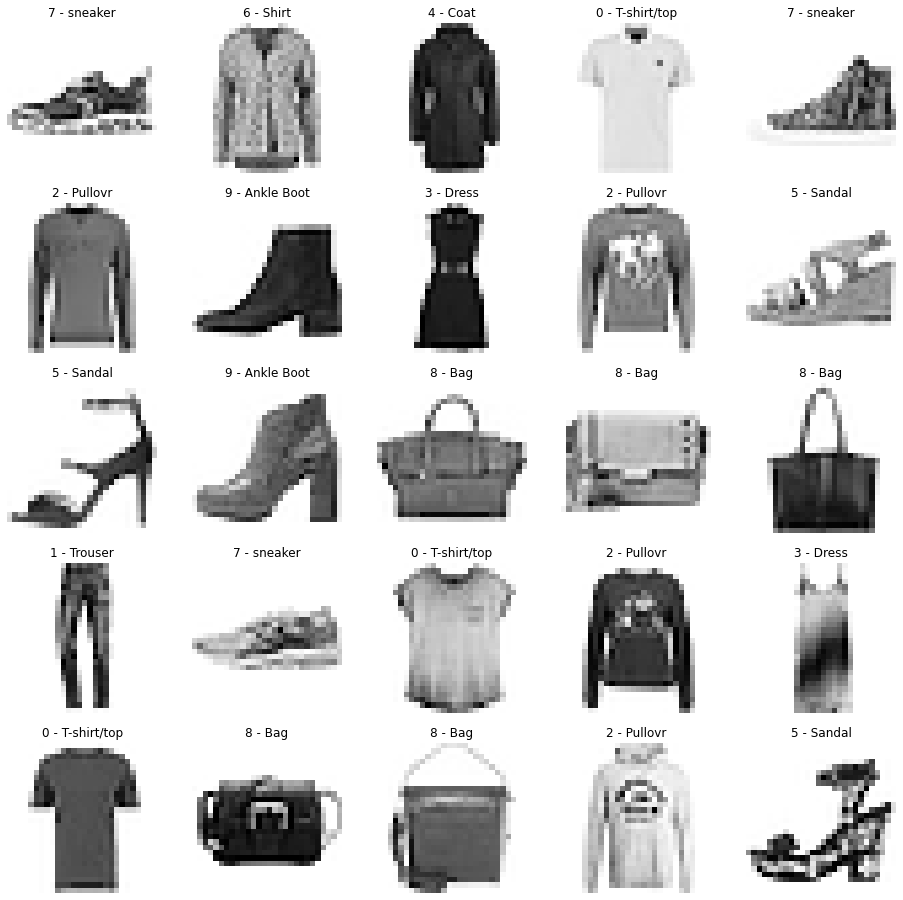

In [6]:
plt.figure(figsize=(16,16))
j = 1
for i in np.random.randint(0, 1000, 25):
    plt.subplot(5, 5, j)
    j += 1
    plt.imshow(x_train[i], cmap='Greys')
    plt.axis('off')
    plt.title(f'{y_train[i]} - {class_labels[y_train[i]]}')

In [7]:
#Change the dimension of the data for CNN
print(f'Current dimension of the X Train:- {x_train.ndim}')
print(f'Current dimension of the X Test:- {x_test.ndim}')
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(f'Changed dimension of the X Train:- {x_train.ndim}')
print(f'Changed dimension of the X Test:- {x_test.ndim}')

Current dimension of the X Train:- 3
Current dimension of the X Test:- 3
Changed dimension of the X Train:- 4
Changed dimension of the X Test:- 4


In [8]:
#Feature scaling(To convert data between 0 and 1)
x_train = x_train/255
x_test= x_test/255
print(f'X Train after scaling:-\n{x_train}')
print(f'X Test after scaling:-\n{x_test}')

X Train after scaling:-
[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=2020)

In [10]:
print(f'X Train:-\n{x_train}')
print(f'X Val:-\n{x_val}')
print(f'Y Train:-\n{y_train}')
print(f'Y Val:-\n{y_val}')

X Train:-
[[[[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  ...

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]]


 [[[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  ...

  [[0.        ]
   [0.       

In [11]:
print(f'Shape of X Train:-{x_train.shape}')
print(f'Shape of X Val:-{x_val.shape}')
print(f'Shape of Y Train:-{y_train.shape}')
print(f'Shape of Y Val:-{y_train.shape}')

Shape of X Train:-(48000, 28, 28, 1)
Shape of X Val:-(12000, 28, 28, 1)
Shape of Y Train:-(48000,)
Shape of Y Val:-(48000,)


In [12]:
#Build the model
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid', activation='relu', input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
#Train the model
model.fit(x_train, y_train, epochs=10, batch_size=512, verbose=1, validation_data=(x_val,y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 38s 800us/step - loss: 0.6243 - accuracy: 0.7886 - val_loss: 0.4321 - val_accuracy: 0.8543
Epoch 2/10
48000/48000 [==============================] - 41s 858us/step - loss: 0.3832 - accuracy: 0.8659 - val_loss: 0.3629 - val_accuracy: 0.8765
Epoch 3/10
48000/48000 [==============================] - 35s 739us/step - loss: 0.3345 - accuracy: 0.8830 - val_loss: 0.3351 - val_accuracy: 0.8848
Epoch 4/10
48000/48000 [==============================] - 36s 746us/step - loss: 0.3057 - accuracy: 0.8922 - val_loss: 0.3284 - val_accuracy: 0.8863
Epoch 5/10
48000/48000 [==============================] - 36s 747us/step - loss: 0.2795 - accuracy: 0.9027 - val_loss: 0.3015 - val_accuracy: 0.8978
Epoch 6/10
48000/48000 [==============================] - 35s 738us/step - loss: 0.2620 - accuracy: 0.9094 - val_loss: 0.2929 - val_accuracy: 0.8975
Epoch 7/10
48000/48000 [==============================] 

In [16]:
#Testing of the model
prediction = model.predict(np.expand_dims(x_test[0], axis=0)).round(2)

In [17]:
np.argmax(prediction)

9

In [18]:
y_test[0]

9

In [19]:
predict = model.predict(x_test).round(2)
print(f'Predictions:- {predict}')

Predictions:- [[0.   0.   0.   ... 0.01 0.   0.99]
 [0.   0.   1.   ... 0.   0.   0.  ]
 [0.   1.   0.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.   0.99 0.  ]
 [0.   1.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.12 0.04 0.01]]


In [20]:
#Evaluate the model
evaluation = model.evaluate(x_test, y_test)
print(f'Evaluation:- {evaluation}')

10000/10000 [==============================] - 4s 361us/step
Evaluation:- [0.28112630631923674, 0.8991000056266785]


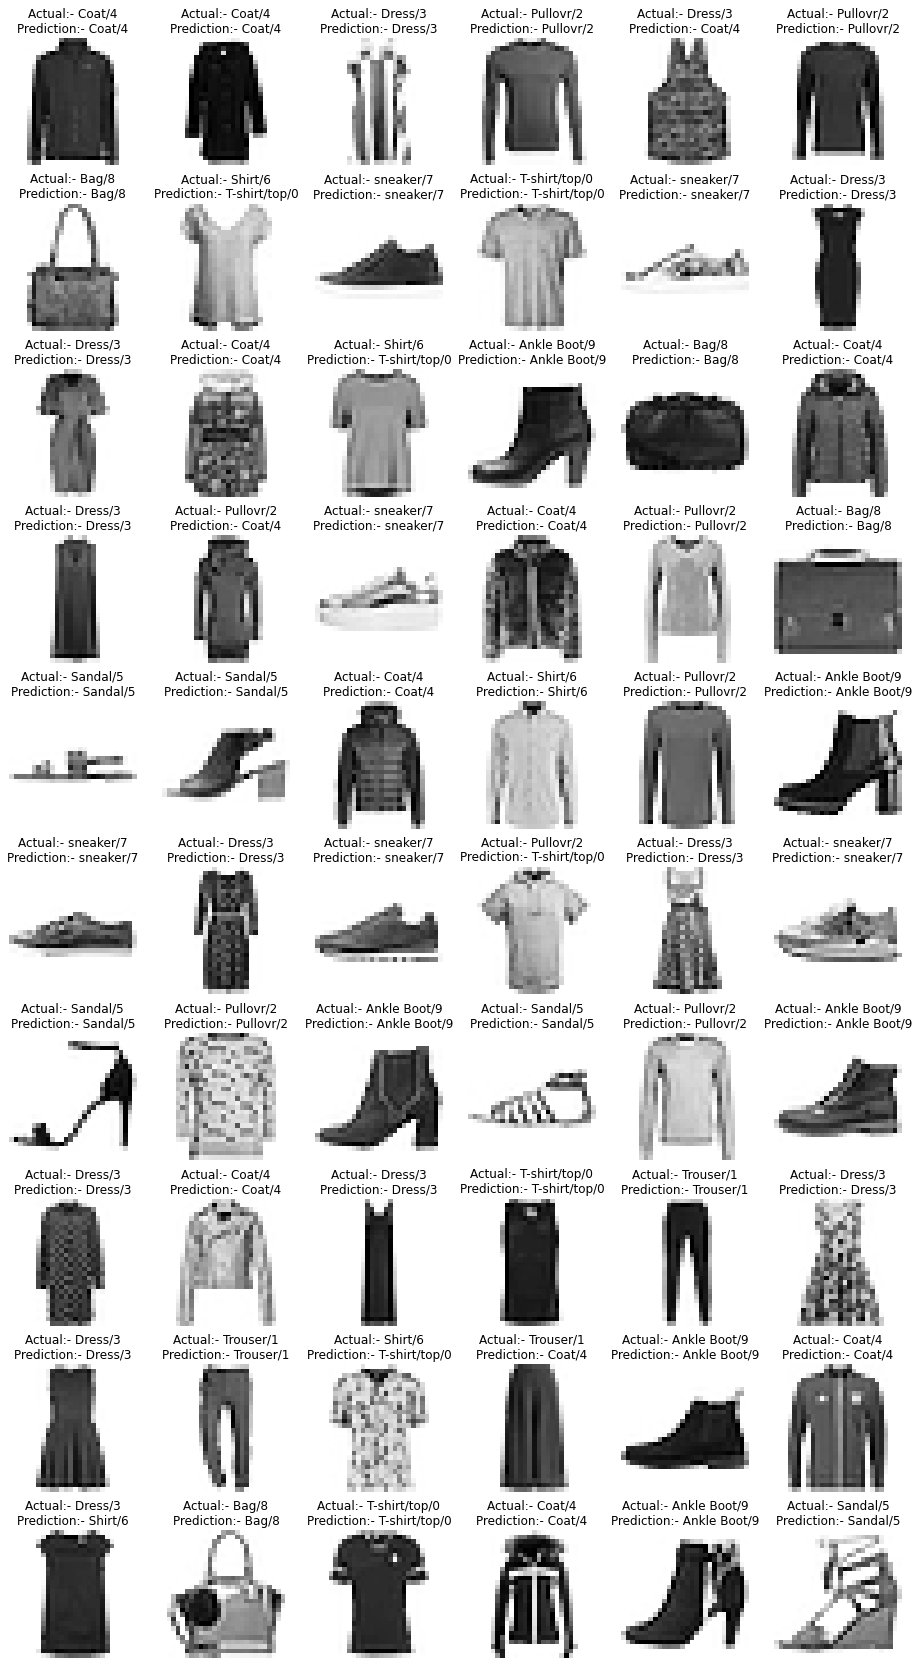

In [21]:
#Visualize the output
plt.figure(figsize=(16, 30))
j = 1
for i in np.random.randint(0, 10000, 60):
    plt.subplot(10, 6, j)
    j += 1
    plt.imshow(x_test[i].reshape(28, 28), cmap='Greys')
    plt.title(f'Actual:- {class_labels[y_test[i]]}/{y_test[i]}\nPrediction:- {class_labels[np.argmax(predict[i])]}/{np.argmax(predict[i])}')
    plt.axis('off')

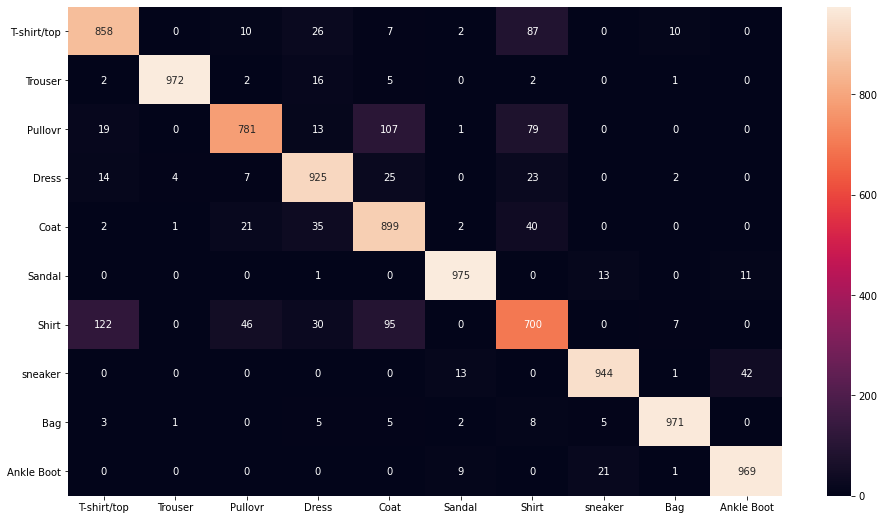

In [22]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
predict_labels = [np.argmax(label) for label in predict]
cm = confusion_matrix(y_test, predict_labels)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.show()

In [23]:
#Classification report
from sklearn.metrics import classification_report
cr = classification_report(y_test, predict_labels, target_names=class_labels)
print(f'Classification Report:-\n{cr}')

Classification Report:-
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.86      0.85      1000
     Trouser       0.99      0.97      0.98      1000
     Pullovr       0.90      0.78      0.84      1000
       Dress       0.88      0.93      0.90      1000
        Coat       0.79      0.90      0.84      1000
      Sandal       0.97      0.97      0.97      1000
       Shirt       0.75      0.70      0.72      1000
     sneaker       0.96      0.94      0.95      1000
         Bag       0.98      0.97      0.97      1000
  Ankle Boot       0.95      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [24]:
#Save the model
model.save('fashion_model.h5')

In [25]:
#Deploy the mode
deploy_model = keras.models.load_model('fashion_model.h5')

In [26]:
#Prediction
deploy_model.predict(x_test).round(2)

array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.12, 0.04, 0.01]], dtype=float32)

In [27]:
#Prediction
deploy_model.predict(np.expand_dims(x_test[0], axis=0)).round(2)
# print('The maximum value is:-')
# np.argmax(deploy_model.predict(np.expand_dims(x_test[0], axis=0)).round(2))

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.99]],
      dtype=float32)

In [28]:
#Complex convolutional network(By adding more or  more layers we can make the model complex but better)
model_2 = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid', activation='relu', input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu', input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [29]:
#Compile the model
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
#Train the model
model_2.fit(x_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(x_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 48s 1ms/step - loss: 1.0206 - accuracy: 0.6204 - val_loss: 0.5666 - val_accuracy: 0.7817
Epoch 2/20
48000/48000 [==============================] - 40s 832us/step - loss: 0.5528 - accuracy: 0.7947 - val_loss: 0.4661 - val_accuracy: 0.8294
Epoch 3/20
48000/48000 [==============================] - 50s 1ms/step - loss: 0.4625 - accuracy: 0.8303 - val_loss: 0.4012 - val_accuracy: 0.8519
Epoch 4/20
48000/48000 [==============================] - 50s 1ms/step - loss: 0.4028 - accuracy: 0.8526 - val_loss: 0.3719 - val_accuracy: 0.8633
Epoch 5/20
48000/48000 [==============================] - 47s 972us/step - loss: 0.3663 - accuracy: 0.8661 - val_loss: 0.3423 - val_accuracy: 0.8748
Epoch 6/20
48000/48000 [==============================] - 48s 1ms/step - loss: 0.3426 - accuracy: 0.8732 - val_loss: 0.3253 - val_accuracy: 0.8815
Epoch 7/20
48000/48000 [==============================] - 51s 1m

In [31]:
#Evaluate the model
model_2.evaluate(x_test, y_test)

10000/10000 [==============================] - 4s 352us/step


[0.2668180941224098, 0.9063000082969666]

In [32]:
#Save the complex model
model_2.save('fashion_mnist_complex.h5')